In [1]:
# This is my first Python kernel using the Jupyter notebook, using an example of text mining and NLP processing. I followed the DataCamp course 
# https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python for the NLP steps however this kernel uses a different 
# and larger dataset to the datasets used in the course, to get a better understanding of the end to end process.

# The objectives are to learn how to :
# - download and import packages using pip
# - get familiar with some of the commonly used Python packages
# - import a csv file using pandas
# - perform initial data summaries
# - manipulate data from dataframe to a list
# - clean text data using simple preprocessing methods including word tokenisation using nltk
# - visualise a histogram plot using pandas and matplotlib
# - use basic NLP methods topic modeling and named entity recognition using spaCy
# - visualise the text in a wordcloud

In [2]:
# Import packages and modules
import numpy as np
import pandas as pd
from collections import Counter

import nltk
# nltk.download('punkt') # Install the punkt tokenizer one time. This gave an error on first run
# nltk.download('maxent_treebank_pos_tagger') # Install Treebank part of speech tagger. This gave error on first run
# nltk.download('averaged_perceptron_tagger') # Install tagger. This gave error on first run
# nltk.download("stopwords") # Install the stopwords one time.
from nltk.corpus import stopwords 
# !{sys.executable} -m pip install stop_words # Install the stop_words 
from stop_words import get_stop_words

from collections import Counter

# import sys # Use Sys to install gensim
# !{sys.executable} -m pip install gensim
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora.dictionary import Dictionary

# !pip install --upgrade setuptools
# !pip install Twisted-18.4.0-cp36-cp36m-win_amd64.whl
# import sys # Use Sys to install spaCy
# !{sys.executable} -m pip install spaCy
# !pip install -U spacy && python -m spacy download en
from spacy import displacy
import en_core_web_sm # the linking to 'en' failed so importing full model
import spacy

from matplotlib  import pyplot as plt

# import sys # Use Sys to install wordcloud
# !{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud

C:\Users\Home\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
## Import Data

In [4]:
# Check the working directory and set to the local directory with the csv file
import os
os.getcwd()

'C:\\Users\\Home'

In [5]:
os.chdir('C:\\Users\\Home\\Documents\\Python')

In [6]:
# Read in the csv file abcnews-date-text.csv using Pandas and parsing the date column
path = 'abcnews-date-text.csv'
abc = pd.read_csv(path, parse_dates=[0], infer_datetime_format=True)

In [7]:
## Data Summary

In [8]:
# Let's take a look at summaries of the abc pandas DataFrame

In [9]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103665 entries, 0 to 1103664
Data columns (total 2 columns):
publish_date     1103665 non-null datetime64[ns]
headline_text    1103665 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 16.8+ MB


In [10]:
abc.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [11]:
len(abc)

1103665

In [12]:
## Slice Data

In [13]:
# Create a string vector with just the values from the  headline_text column
abctext= abc.loc[:,'headline_text'].values

In [14]:
# Check the class of the new string vector
type(abctext)

numpy.ndarray

In [15]:
len(abctext)

1103665

In [16]:
# Let's take a look at the abctext to check that the indices have been removed. We use the print function on this one dimensional array
print(abctext[:10])

['aba decides against community broadcasting licence'
 'act fire witnesses must be aware of defamation'
 'a g calls for infrastructure protection summit'
 'air nz staff in aust strike for pay rise'
 'air nz strike to affect australian travellers'
 'ambitious olsson wins triple jump'
 'antic delighted with record breaking barca'
 'aussie qualifier stosur wastes four memphis match'
 'aust addresses un security council over iraq'
 'australia is locked into war timetable opp']


In [17]:
## Text Preprocessing - Word Tokenization

In [18]:
# Create a list unique word tokens for each string in the list abctext, using word_tokenize from nltk. 
# We iterate over each sentence using list comprehension
from nltk.tokenize import word_tokenize
abc_tokens = [word_tokenize(sentence) for sentence in abctext]

In [19]:
# Take a look a the length of the list and check this is the same length as the imported file
len(abc_tokens)

1103665

In [20]:
# Take a look at the top 10 contents of the abc_tokens
abc_tokens[:10]

[['aba', 'decides', 'against', 'community', 'broadcasting', 'licence'],
 ['act', 'fire', 'witnesses', 'must', 'be', 'aware', 'of', 'defamation'],
 ['a', 'g', 'calls', 'for', 'infrastructure', 'protection', 'summit'],
 ['air', 'nz', 'staff', 'in', 'aust', 'strike', 'for', 'pay', 'rise'],
 ['air', 'nz', 'strike', 'to', 'affect', 'australian', 'travellers'],
 ['ambitious', 'olsson', 'wins', 'triple', 'jump'],
 ['antic', 'delighted', 'with', 'record', 'breaking', 'barca'],
 ['aussie', 'qualifier', 'stosur', 'wastes', 'four', 'memphis', 'match'],
 ['aust', 'addresses', 'un', 'security', 'council', 'over', 'iraq'],
 ['australia', 'is', 'locked', 'into', 'war', 'timetable', 'opp']]

In [21]:
## Text Preprocessing - Remove Stop Words

In [22]:
# Get lists of stop words and remove the stop words from the list of word tokens
stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(stop_words)

In [23]:
stop_words[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and']

In [24]:
# Convert the nested list into a single sequence of tokens using itertools.chain
from itertools import chain
abc_tokens_list = list(chain(*abc_tokens))

In [25]:
# Remove the stop words from this list using a for loop
abc_tokens_no_stopwords = [token for token in abc_tokens_list
                           if token not in stop_words ]

In [26]:
# Check that this is now a single list and that the stop words have been removed
abc_tokens_no_stopwords[:20]

['aba',
 'decides',
 'community',
 'broadcasting',
 'licence',
 'act',
 'fire',
 'witnesses',
 'must',
 'aware',
 'defamation',
 'g',
 'calls',
 'infrastructure',
 'protection',
 'summit',
 'air',
 'nz',
 'staff',
 'aust']

In [27]:
## Topic Modelling - Bag-of-words Word Counts

In [28]:
# Given the list of processed word tokens we can start analysing the data. 
# First we will use the basic method bag-of-words to find topics in the text data. This method counts the number ie frequency 
# of the the word tokens to identify the significant words. Let's first use the Counter function from collections package  across all years 
wordcount = dict(Counter(abc_tokens_no_stopwords).most_common(10))
wordcount

{'council': 16363,
 'court': 16383,
 'fire': 13908,
 'govt': 16935,
 'interview': 15025,
 'man': 28109,
 'new': 29087,
 'police': 35985,
 'says': 20001,
 'us': 17536}

In [29]:
wordcount.items()

dict_items([('police', 35985), ('new', 29087), ('man', 28109), ('says', 20001), ('us', 17536), ('govt', 16935), ('court', 16383), ('council', 16363), ('interview', 15025), ('fire', 13908)])

In [30]:
# Prepare the data using pandas to be plotted with matplotlib package
wordcount_df = pd.DataFrame.from_dict(wordcount,orient='index')
wordcount_df.columns=['Frequency']
wordcount_df

,Frequency
police,35985
new,29087
man,28109
says,20001
us,17536
govt,16935
court,16383
council,16363
interview,15025
fire,13908


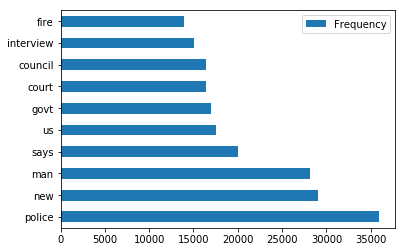

In [31]:
%matplotlib inline
wordcount_df.plot(kind='barh')

In [32]:
# Here we are calculating using the nltk function FreqDist.
fdist =nltk.FreqDist(abc_tokens_no_stopwords)
fdist.most_common(10)

[('police', 35985),
 ('new', 29087),
 ('man', 28109),
 ('says', 20001),
 ('us', 17536),
 ('govt', 16935),
 ('court', 16383),
 ('council', 16363),
 ('interview', 15025),
 ('fire', 13908)]

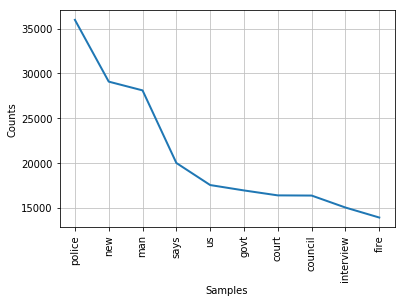

In [33]:
# Plot the 10 most frequent terms using nltk.FreqDist and plot
fdist.plot(10)

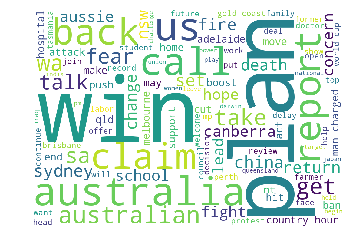

In [34]:
# Create a wordcloud as an alternative to a chart to visualise frequent words. We will need to use the string format of the tokenized data
import string
newwords = {'say' ,'says', 'new'}
wordcloud = WordCloud(width = 1024,
                      height = 720, 
                      background_color="white",
                      max_words=100,
                      stopwords=newwords,
                      margin=0).generate(str(abc_tokens_no_stopwords).replace("'", ""))
 
# Display the generated image:
%matplotlib inline
plt.imshow(wordcloud)
#plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [35]:
## Topic Modeling using tf-idf Model

In [36]:
# Next use gensim to create a dictionary on the tokenized sentences. gensim is a specialised ppackage for topic modeling
dictionary = Dictionary(abc_tokens)

In [37]:
# Take a look at the top 10 dictionary items with the keys
{k: dictionary[k] for k in sorted(dictionary.keys())[:10]}

{0: 'aba',
 1: 'against',
 2: 'broadcasting',
 3: 'community',
 4: 'decides',
 5: 'licence',
 6: 'act',
 7: 'aware',
 8: 'be',
 9: 'defamation'}

In [38]:
# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in abc_tokens]

In [39]:
# There are some words that we might want to downweight in importance as they are commonly used words. 
# We can use the tf-idf model from gensim package
tfidf =TfidfModel(corpus)

In [40]:
# Calculate the tfidf weights of the corpus: tfidf_weights
tfidf_weights = tfidf[corpus]

In [41]:
print(tfidf_weights)

In [42]:
## Named Entity Recognition using spaCy

In [43]:
# We can use spaCy to extract linguistic features like part-of-speech tags, dependency labels and named entities, 
# customising the tokenizer and working with the rule-based matcher. https://spacy.io/usage/linguistic-features

In [44]:
# First load the en library
nlp = en_core_web_sm.load()

In [94]:
# If we run the nlp function on the whole abctext, we get an error ValueError: [E088] Text of length 58712426 exceeds maximum of 1000000. 
# Therefore we will only run on a sample in this exercise
doc=nlp(str(abctext[:100]))

In [95]:
# Take a look at the parts of speech tagging
for token in doc[:10]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

[ [ PUNCT -LRB- punct [ False False
' ' PUNCT `` punct ' False False
aba aba NOUN NN nsubj xxx True False
decides decide VERB VBZ ROOT xxxx True False
against against ADP IN prep xxxx True True
community community NOUN NN compound xxxx True False
broadcasting broadcasting NOUN NN compound xxxx True False
licence licence NOUN NN pobj xxxx True False
' ' PUNCT `` punct ' False False

  
  SPACE _SP  
  False False


In [98]:
# Print all of the found CARDINAL entities and their labels
for ent in doc.ents:
    if ent.label_ == 'CARDINAL':
        print(ent.label_, ent.text)

CARDINAL four
CARDINAL 10 million
CARDINAL three
CARDINAL four
CARDINAL eight million
CARDINAL 314
CARDINAL more than 40


In [96]:
# Print all of the found GPE (country) entities and their labels
for ent in doc.ents:
    if ent.label_ == 'GPE':
        print(ent.label_, ent.text)

GPE kuwait


In [97]:
# Visualise the entity recogniser  which is using the downloaded en model. Note to improve the entity recogniser we would need to train a model.
#nlp = spacy.load('custom_ner_model')
displacy.render(doc, style='ent',jupyter=True)